# <center> Thermalization </center>

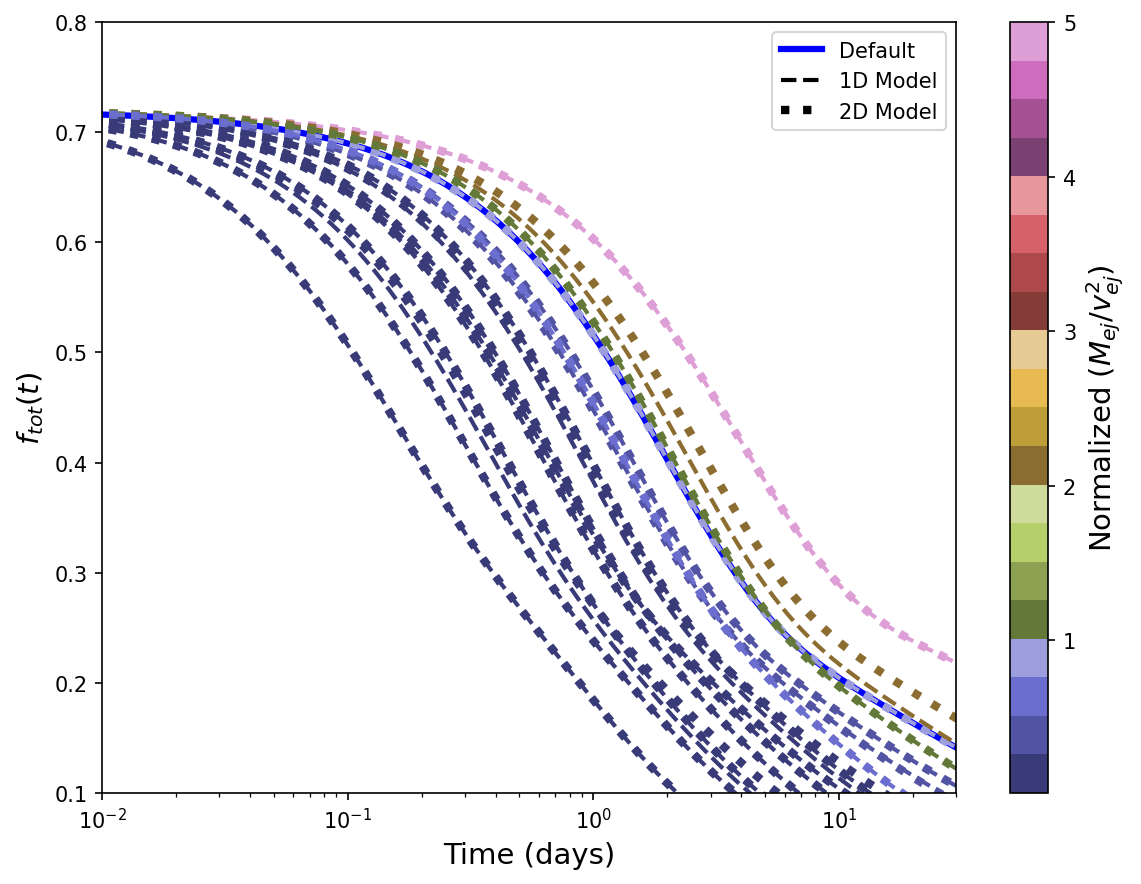

In [1]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

from nudca.kilonovae.heating_rate import ThermalizationEfficiency


Mej = [1.e-3, 5.e-3, 1.e-2, 5.e-2]
vej = [0.1, 0.15, 0.2, 0.3]

norm = mcolors.Normalize(vmin=min(Mej) / max(vej) ** 2, vmax=max(Mej) / min(vej) ** 2)
cmap = cm.tab20b
sm = cm.ScalarMappable(cmap=cmap, norm=norm)

times = np.geomspace(1e-3, 1e7, 1000)
thermal = ThermalizationEfficiency(thermal_scheme='Barnes2016_Default')(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.plot(times/86400, thermal, ls='-', lw=3, color='b')
for m, v in product(Mej, vej):
    norm_value = m/v**2
    color = cmap(norm(norm_value))
    thermal_1d = ThermalizationEfficiency('Barnes2016_1D', m, v)(times)
    thermal_2d = ThermalizationEfficiency('Barnes2016_2D', m, v)(times)
    
    ax.plot(times/86400, thermal_1d, ls='--', lw=2, color=color)
    ax.plot(times/86400, thermal_2d, ls=':', lw=4, color=color)


ax.set_xlim(1.e-2, 30)
ax.set_ylim(1.e-1, 0.8)
ax.set_xscale('log')
# ax.set_yscale('log')

plt.xlabel("Time (days)", fontsize=14)
plt.ylabel(r"$f_{tot}(t)$", fontsize=14)

cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label(r'Normalized ($M_{ej} / v_{ej}^2$)', fontsize=14)
legend_elements = [
    Line2D([0], [0], color='b', lw=3, linestyle='-', label='Default'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label='1D Model'),
    Line2D([0], [0], color='black', lw=4, linestyle=':', label='2D Model')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

# fig.savefig('G:/figures/therma_eff.png', dpi=300)


In [ ]:
f_th = ThermalizationEfficiency(
        thermal_scheme='Barnes2016_1D', # ['Barnes2016_Default', 'Barnes2016_1D', 'Barnes2016_2D']
        mass_ejecta=2.e-2,   # units: M_sun
        vel_ejecta=0.2       # units:: c
    )(times)

# <center> Radioactive Heating Rate </center>

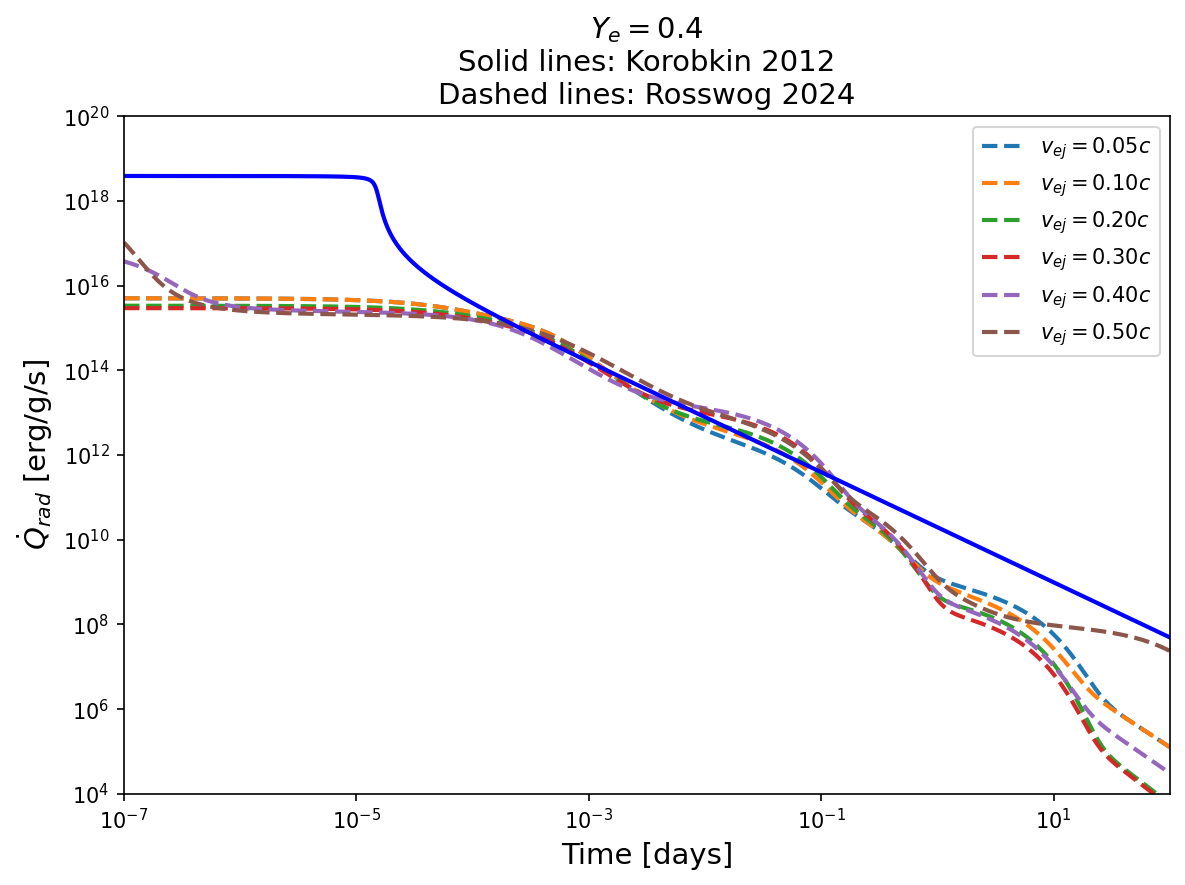

In [2]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from nudca.kilonovae.heating_rate import RadioactiveHeatingRate

vel = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

times = np.geomspace(1e-7, 1e2, 5000) * 86400
q_Korobkin = RadioactiveHeatingRate(heating_scheme='Korobkin2012')(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
for v in vel:
    q_Rosswog = RadioactiveHeatingRate(
        heating_scheme='Rosswog2024',
        electron_fraction=0.4,
        vel_ejecta=v)(times)
    ax.plot(times/86400, q_Rosswog, ls='--', lw=2, label=r"$v_{ej} = %.2f c$" % v)


ax.plot(times/86400, q_Korobkin, ls='-', lw=2, color='b')
ax.set_xlim(1.e-7, 1e2)
ax.set_ylim(1.e4, 1.e20)
ax.set_xlabel("Time [days]", fontsize=14)
ax.set_ylabel(r"$\dot{Q}_{rad}$ [erg/g/s]", fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_title(r"$Y_{e} = 0.4$"
             + '\nSolid lines: Korobkin 2012'
             + '\nDashed lines: Rosswog 2024', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

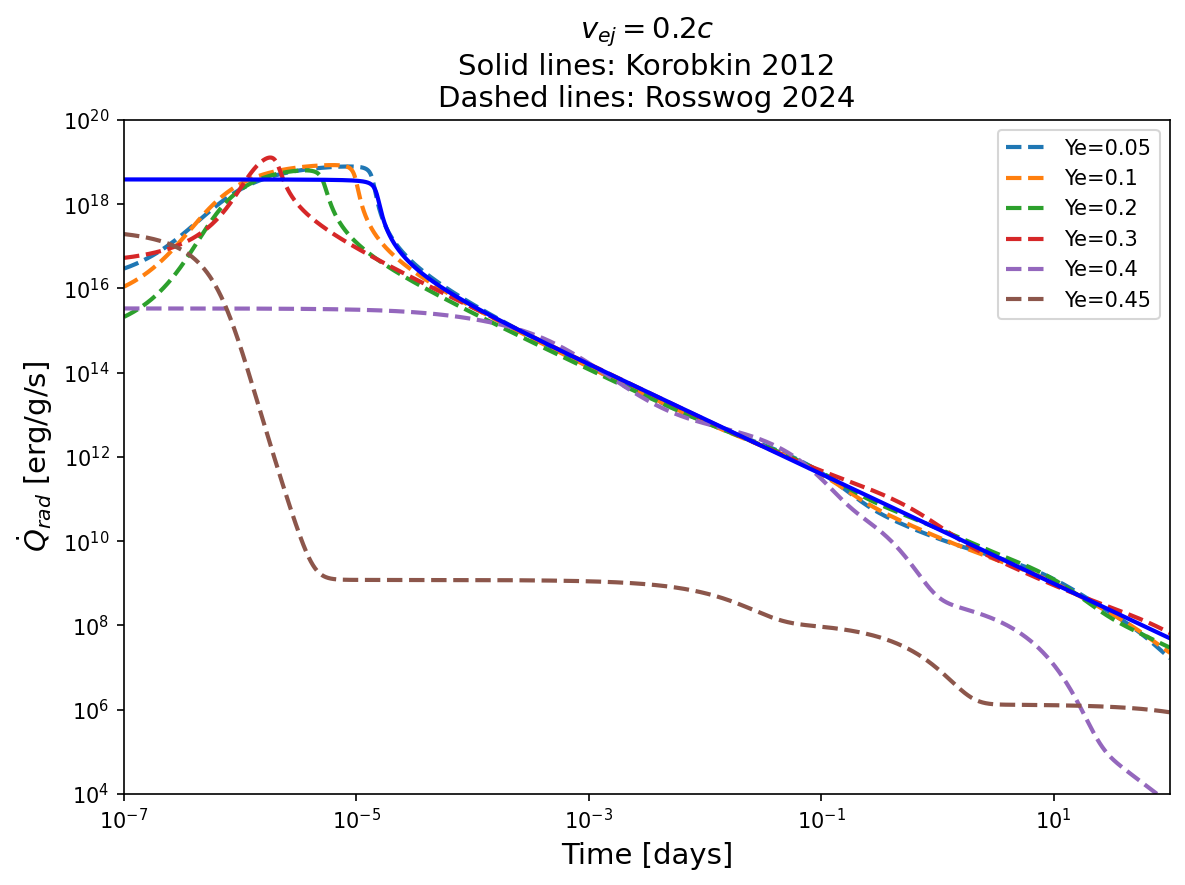

In [3]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from nudca.kilonovae.heating_rate import RadioactiveHeatingRate

Ye_table = [0.05, 0.10, 0.20, 0.30, 0.40, 0.45]

times = np.geomspace(1e-7, 1e2, 5000) * 86400
q_Korobkin = RadioactiveHeatingRate(heating_scheme='Korobkin2012')(times)

fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
for Ye in Ye_table:
    q_Rosswog = RadioactiveHeatingRate(
        heating_scheme='Rosswog2024',
        electron_fraction=Ye,
        vel_ejecta=0.2)(times)
    ax.plot(times/86400, q_Rosswog, ls='--', lw=2, label=f'Ye={Ye}')


ax.plot(times/86400, q_Korobkin, ls='-', lw=2, color='b')
ax.set_xlim(1.e-7, 1e2)
ax.set_ylim(1.e4, 1.e20)
ax.set_xlabel("Time [days]", fontsize=14)
ax.set_ylabel(r"$\dot{Q}_{rad}$ [erg/g/s]", fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title(r"$v_{ej} = 0.2 c$"
             + '\nSolid lines: Korobkin 2012'
             + '\nDashed lines: Rosswog 2024', fontsize=14)
ax.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

# <center> Effective Heating Rate </center>

In [ ]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
import matplotlib.pyplot as plt

from nudca.kilonovae.heating_rate import EffectiveHeatingRate

In [ ]:
import sys
from pathlib import Path
sys.path.insert(1, str(Path.cwd().resolve().parents[1]))

import numpy as np
import matplotlib.pyplot as plt

from nudca.kilonovae.heating_rate import RadioactiveHeatingRate


res = RadioactiveHeatingRate(None, 0.33, 0.22)._interp_2d()

print(res)

0.12319999999999996
